# Books Association Rules

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np

In [2]:
books=pd.read_csv('book.csv')
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


### Returning the items and itemsets with at least 5% support

In [3]:
items = apriori(books, min_support=0.1, use_colnames=True)
items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [4]:
items['Length']=items['itemsets'].apply(lambda x: len(x))
items

,support,itemsets,Length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


# With min lift as 2

In [5]:
rules = association_rules(items, metric="lift", min_threshold=2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
1,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
2,"(CookBks, ChildBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
3,(YouthBks),"(CookBks, ChildBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
4,"(CookBks, ChildBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
5,(DoItYBks),"(CookBks, ChildBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
6,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
7,(RefBks),"(CookBks, ChildBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
8,"(CookBks, ChildBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
9,(ArtBks),"(CookBks, ChildBks)",0.2410,0.2560,0.1265,0.524896,2.050376,0.064804,1.565974


In [6]:
import matplotlib.pyplot as plt

### 90% Confidence interval for support vs confidence

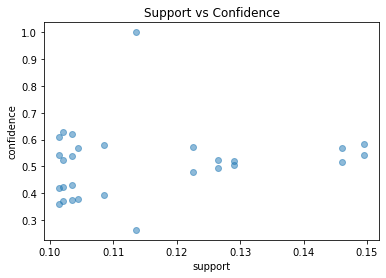

In [7]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### 98% Confidence interval for support vs confidence

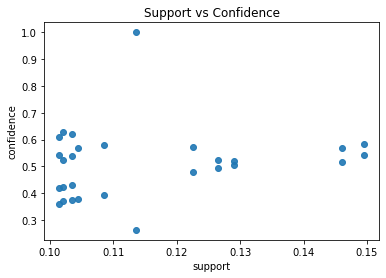

In [8]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.9)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### The scatter plots get darker when confidence interval is increased.

# With min lift as 1

In [9]:
rules2 = association_rules(items, metric="lift", min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


### 90% Confidence interval for support vs confidence

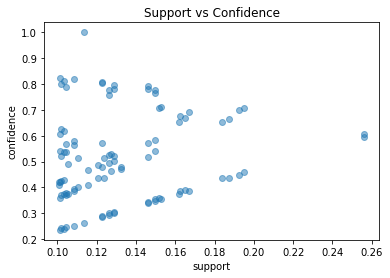

In [10]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### 98% Confidence interval for support vs confidence

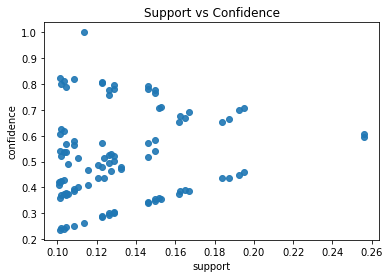

In [11]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.9)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# Lift vs Support

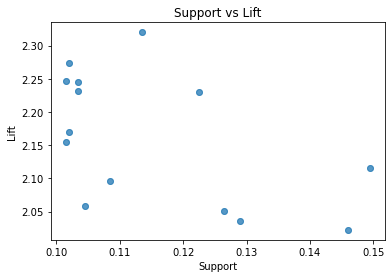

In [12]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

### 98% Confidence interval for support vs lift

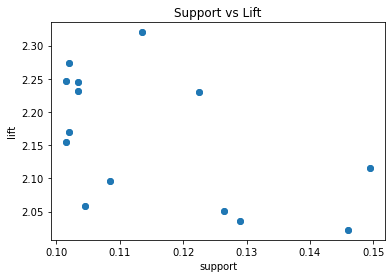

In [13]:
plt.scatter(rules['support'], rules['lift'], alpha=0.9)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [14]:
rules3=rules.sort_values('lift',ascending = False)[0:30]
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
1,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
15,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
16,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
20,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
19,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
24,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
27,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
26,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
25,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [15]:
import networkx as na

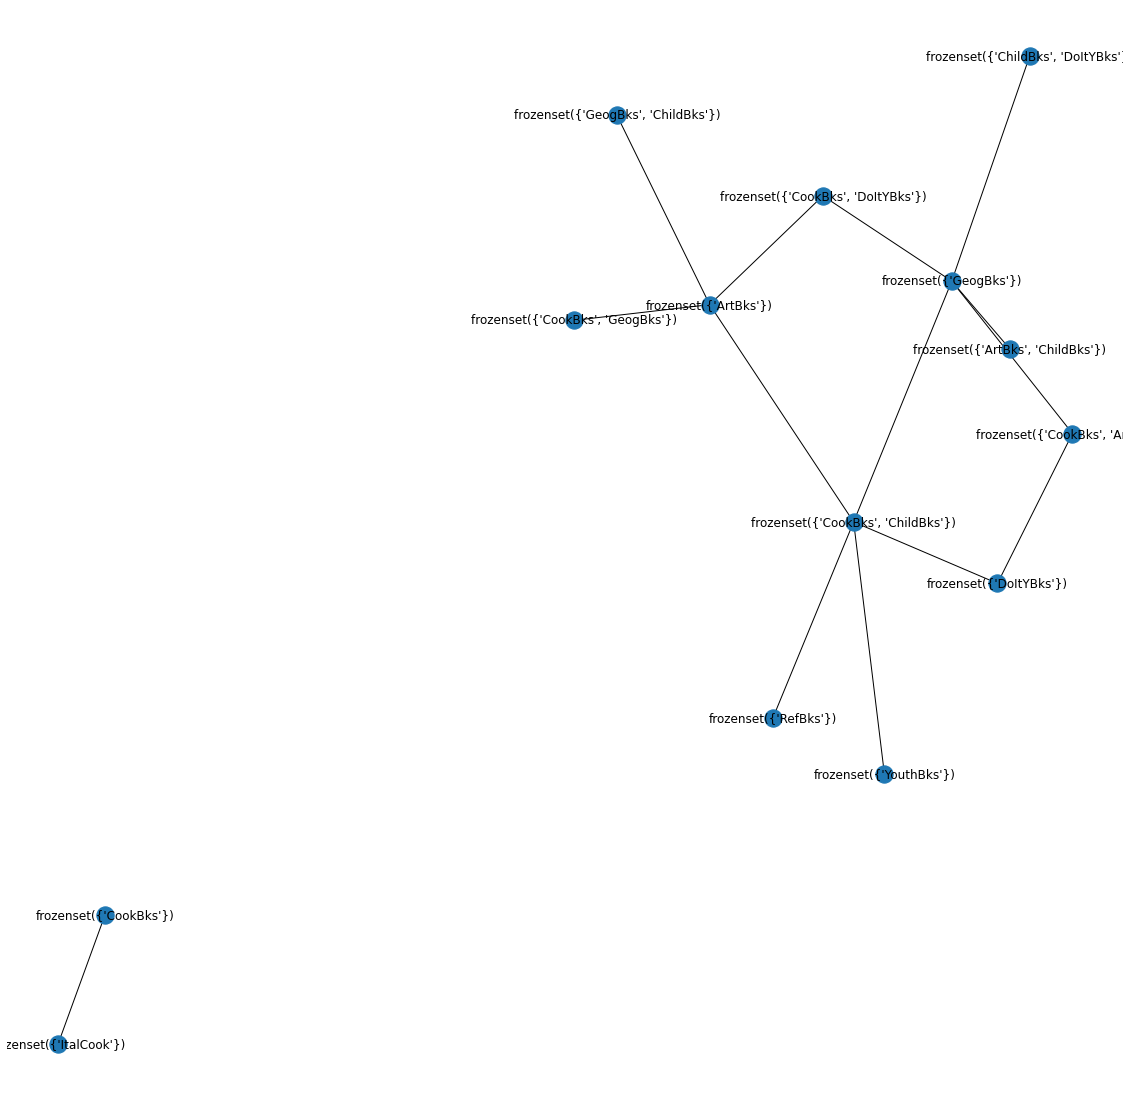

In [16]:
fig, ax=plt.subplots(figsize=(20,20))
Graph=na.from_pandas_edgelist(rules3,'antecedents','consequents')
na.draw(Graph,with_labels=True)
plt.show()

### The above diagram shows the association link between itemsets with lift greater than 2

# Movies Association Rules

In [17]:
movies=pd.read_csv('my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [18]:
movies1=movies[movies.columns[5:15]]
movies1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


### Returning the items and itemsets with at least 20% support

In [19]:
items = apriori(movies1, min_support=0.2, use_colnames=True)
items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [20]:
rules_movies = association_rules(items, metric="lift", min_threshold=1.2)
rules_movies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
1,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


### 90% Confidence interval for support vs confidence

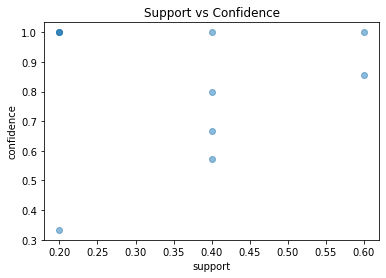

In [21]:
plt.scatter(rules_movies['support'], rules_movies['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### 98% Confidence interval for support vs confidence

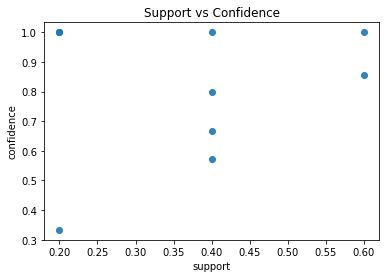

In [22]:
plt.scatter(rules_movies['support'], rules_movies['confidence'], alpha=0.9)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Lift vs Support

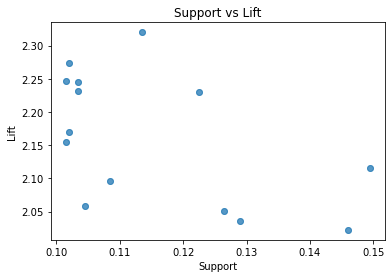

In [23]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

### The values of lift and confidence is highly associated to support

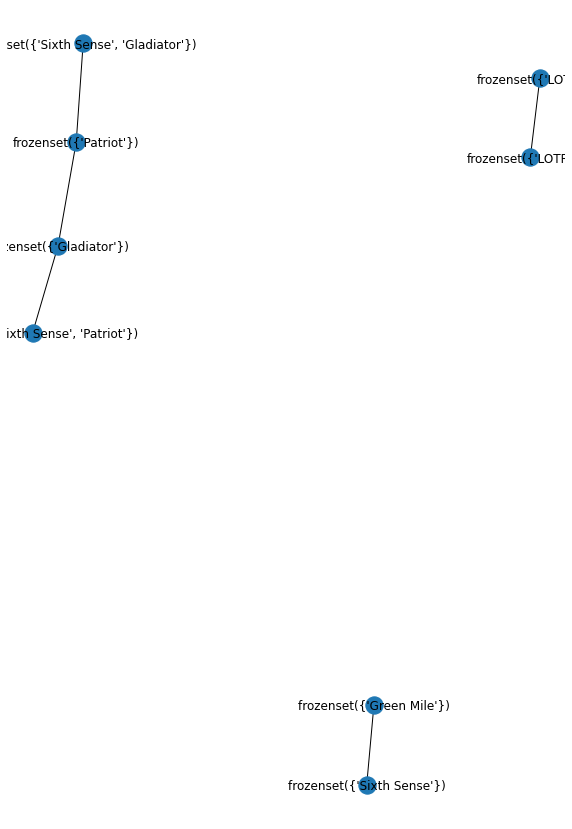

In [26]:
fig, ax=plt.subplots(figsize=(10,15))
Graph2=na.from_pandas_edgelist(rules_movies,'antecedents','consequents')
na.draw(Graph2,with_labels=True)
plt.show()

### Conclusion: The link between Lord of The Ring series and other movies is weak. Meaning - people interested in LOTR series is less likely to watch other movies